# <font color = 'blue'>Importing  libraries</font>

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [249]:
df = pd.read_csv("cstr_faultanalysis2.csv",encoding="iso-8859-1")
df = df.drop(df.columns[-2:],axis =1)

In [250]:
df.head()

,Concentration of A (mol/L),Temperature of inlet flow (°C),Temperature of inlet coolant flow (°C),Coolant flow-rate (L/min),Concentration of B in outlet flow (mol/L),Temperature of outlet flow (°C),Temperature of outlet coolant flow (°C),Fault Type
0,0.5,50,20,5.0,0.1,40,25,Fault Type B
1,0.6,55,22,6.0,0.2,42,26,Fault Type B
2,0.7,60,25,7.0,0.3,45,28,Fault Type B
3,0.8,65,28,8.0,0.4,48,30,Fault Type A
4,0.9,70,30,9.0,0.5,50,32,Fault Type A


In [251]:
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 0


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Concentration of A (mol/L)                 153 non-null    float64
 1   Temperature of inlet flow (°C)             153 non-null    int64  
 2   Temperature of inlet coolant flow (°C)     153 non-null    int64  
 3   Coolant flow-rate (L/min)                  153 non-null    float64
 4   Concentration of B in outlet flow (mol/L)  153 non-null    float64
 5   Temperature of outlet flow (°C)            153 non-null    int64  
 6   Temperature of outlet coolant flow (°C)    153 non-null    int64  
 7   Fault Type                                 153 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 9.7+ KB


In [253]:
df.isnull().sum()

Concentration of A (mol/L)                   0
Temperature of inlet flow (°C)               0
Temperature of inlet coolant flow (°C)       0
Coolant flow-rate (L/min)                    0
Concentration of B in outlet flow (mol/L)    0
Temperature of outlet flow (°C)              0
Temperature of outlet coolant flow (°C)      0
Fault Type                                   0
dtype: int64

In [254]:
df.corr()

,Concentration of A (mol/L),Temperature of inlet flow (°C),Temperature of inlet coolant flow (°C),Coolant flow-rate (L/min),Concentration of B in outlet flow (mol/L),Temperature of outlet flow (°C),Temperature of outlet coolant flow (°C)
Concentration of A (mol/L),1.000000,0.966054,0.964183,0.978461,0.946143,0.947621,0.662911
Temperature of inlet flow (°C),0.966054,1.000000,0.988107,0.985008,0.932964,0.976693,0.708021
Temperature of inlet coolant flow (°C),0.964183,0.988107,1.000000,0.977822,0.946833,0.986010,0.718054
Coolant flow-rate (L/min),0.978461,0.985008,0.977822,1.000000,0.941697,0.964721,0.682166
Concentration of B in outlet flow (mol/L),0.946143,0.932964,0.946833,0.941697,1.000000,0.937214,0.634469
Temperature of outlet flow (°C),0.947621,0.976693,0.986010,0.964721,0.937214,1.000000,0.720383
Temperature of outlet coolant flow (°C),0.662911,0.708021,0.718054,0.682166,0.634469,0.720383,1.000000


In [255]:
df['Concentration of A (mol/L)'].min(),df['Concentration of A (mol/L)'].max()

(0.5, 1.5)

In [256]:
df['Concentration of B in outlet flow (mol/L)'].min(),df['Concentration of B in outlet flow (mol/L)'].max()

(0.1, 1.2)

In [257]:
df.columns

Index(['Concentration of A (mol/L)', 'Temperature of inlet flow (°C)',
       'Temperature of inlet coolant flow (°C)', 'Coolant flow-rate (L/min)',
       'Concentration of B in outlet flow (mol/L)',
       'Temperature of outlet flow (°C)',
       'Temperature of outlet coolant flow (°C)', 'Fault Type'],
      dtype='object')

# <font color = 'red'>Exploratory Data Analysis</font>

In [258]:
df['Fault Type'].unique()

array(['Fault Type B', 'Fault Type A', 'Normal'], dtype=object)

In [259]:
normal = df[df['Fault Type'] == 'Normal']
normal.groupby('Fault Type').size()

Fault Type
Normal    68
dtype: int64

In [260]:
fault_A = df[df['Fault Type'] == 'Fault Type A']
fault_A.groupby('Fault Type').size()

Fault Type
Fault Type A    43
dtype: int64

In [261]:
fault_B = df[df['Fault Type'] == 'Fault Type B']
fault_B.groupby('Fault Type').size()

Fault Type
Fault Type B    42
dtype: int64

In [262]:
normal['Concentration of A (mol/L)'].min(),normal['Concentration of A (mol/L)'].max()

(1.0, 1.5)

In [263]:
normal['Concentration of B in outlet flow (mol/L)'].min(),normal['Concentration of B in outlet flow (mol/L)'].max()

(0.4, 1.2)

<AxesSubplot:>

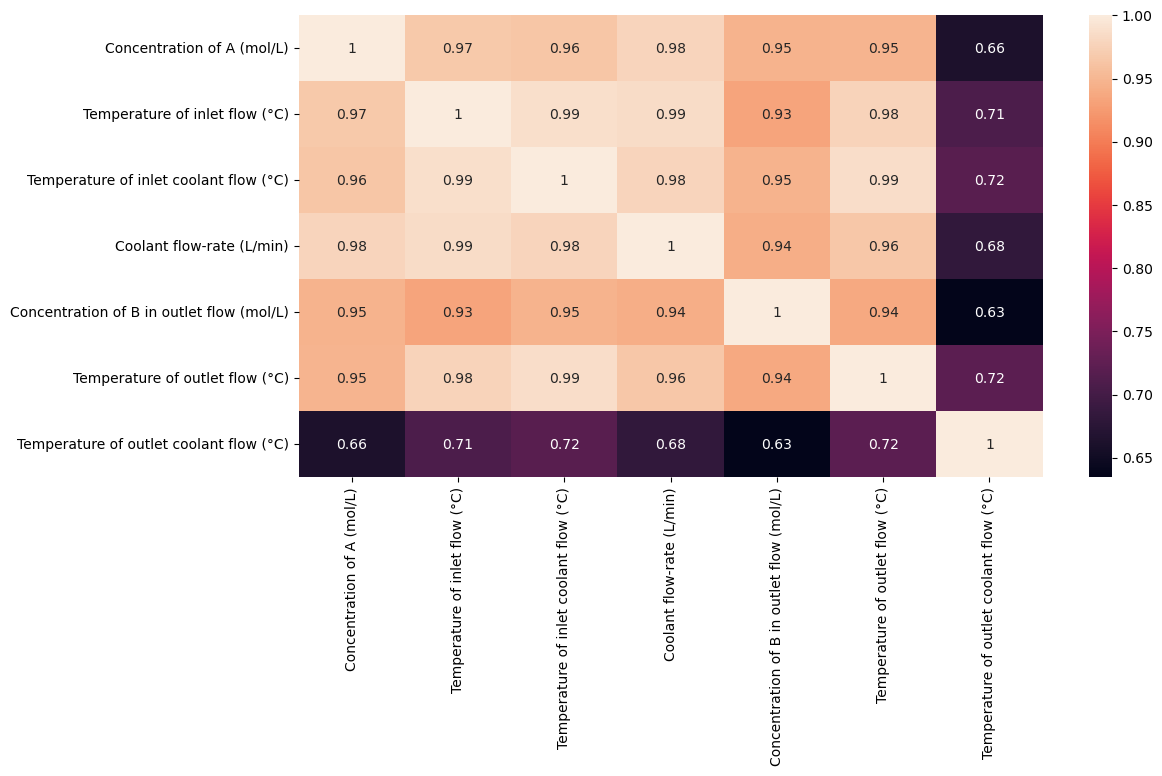

In [264]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)

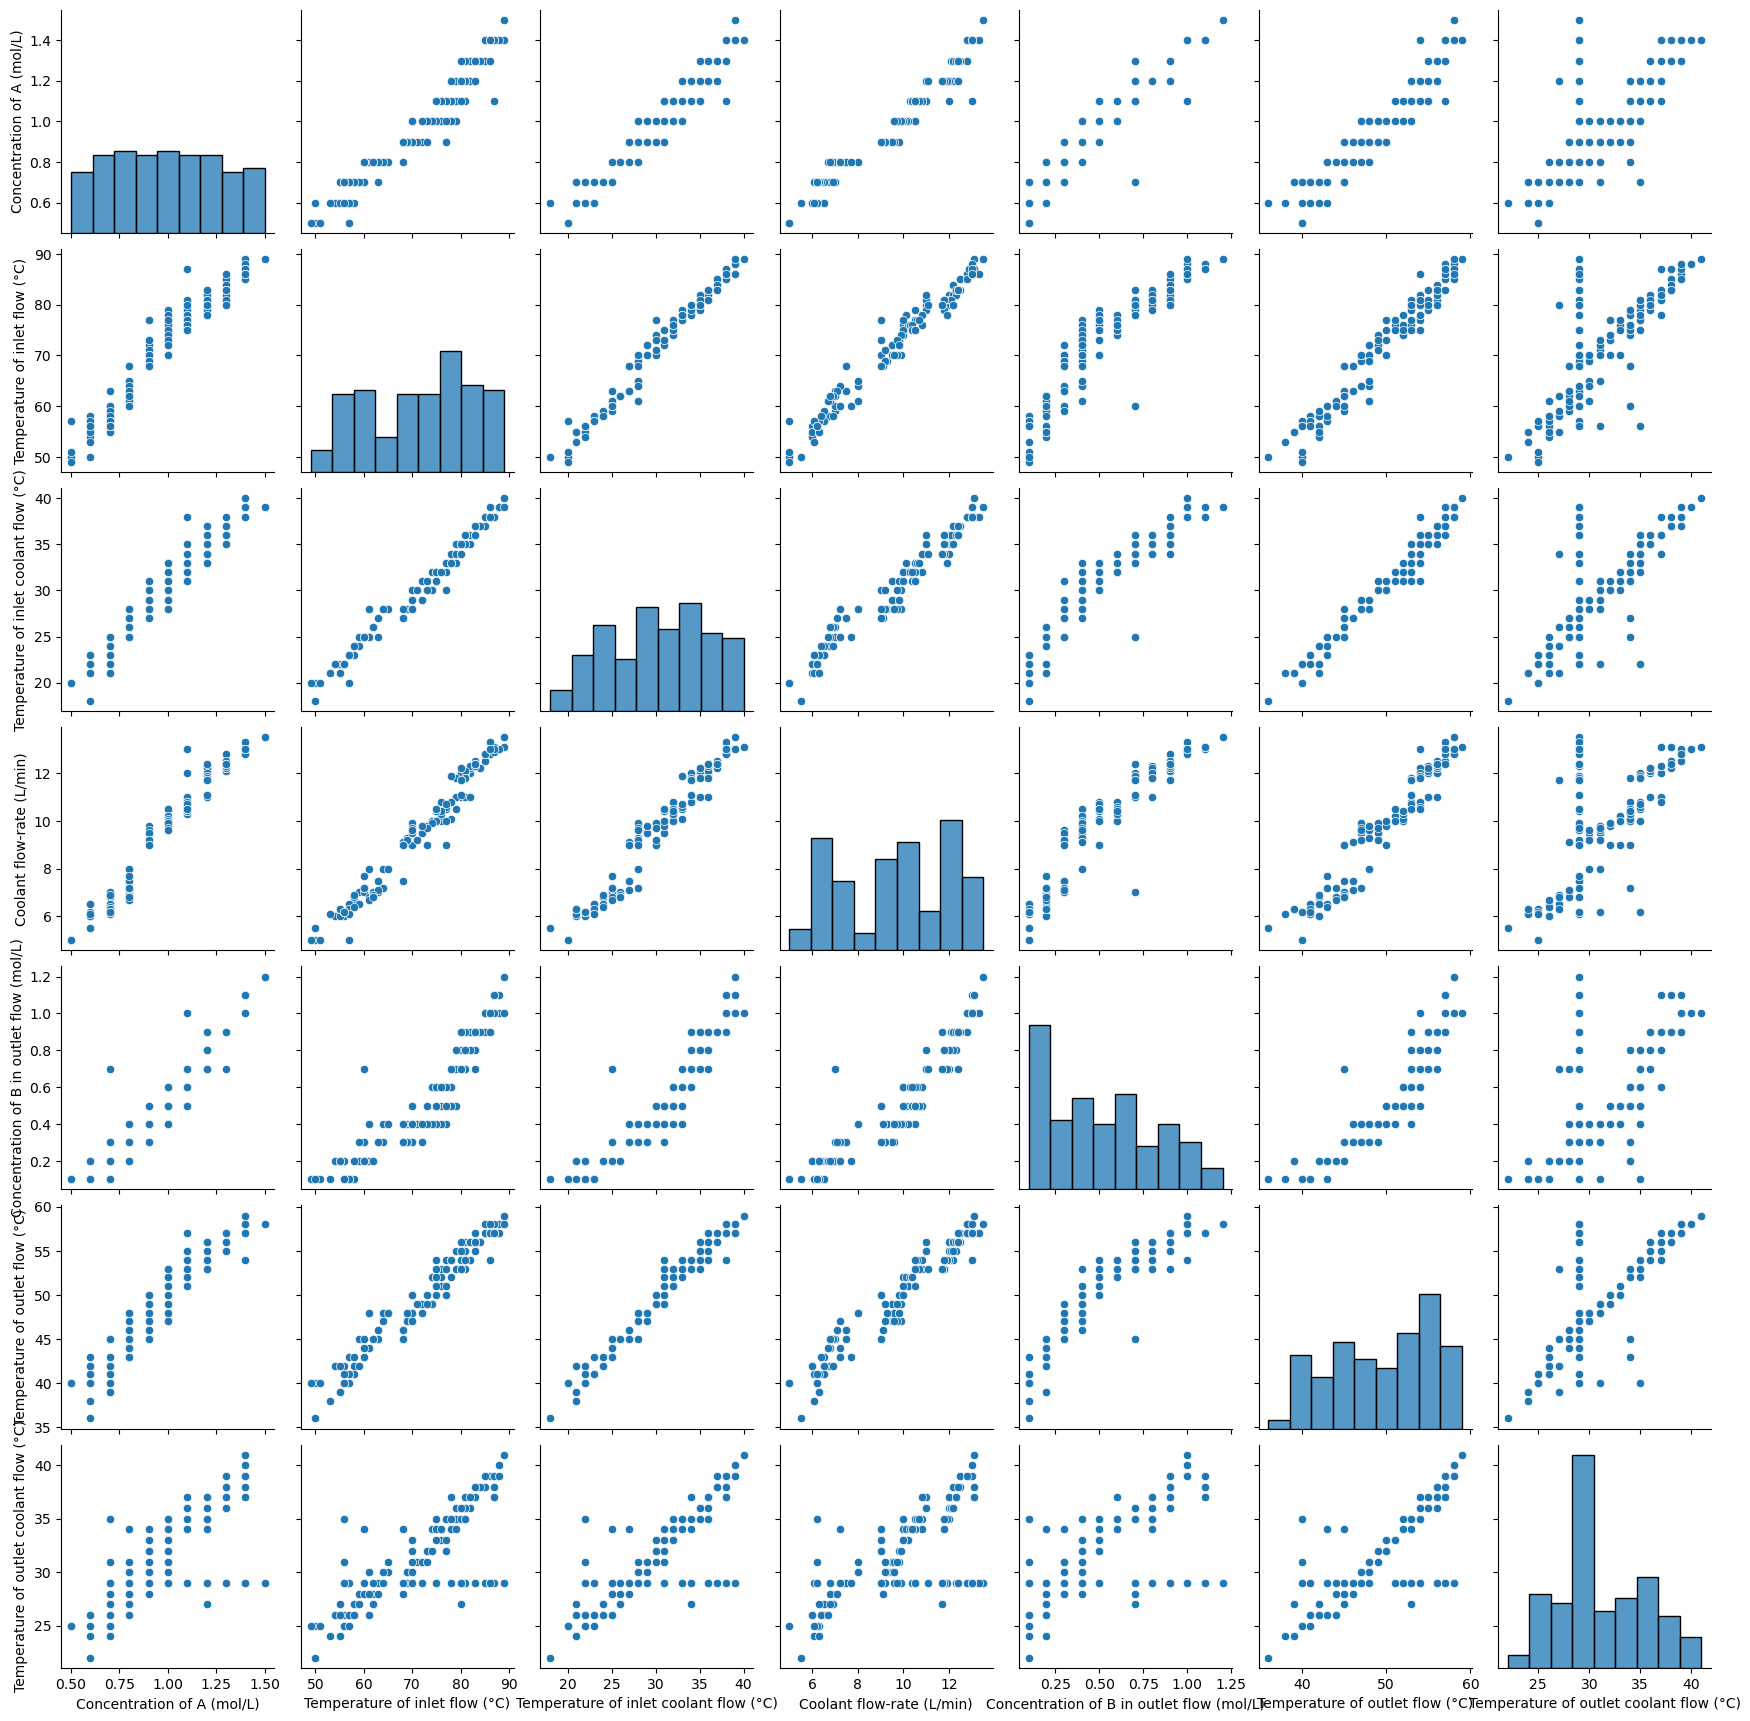

In [265]:
sns.pairplot(df)

<AxesSubplot:>

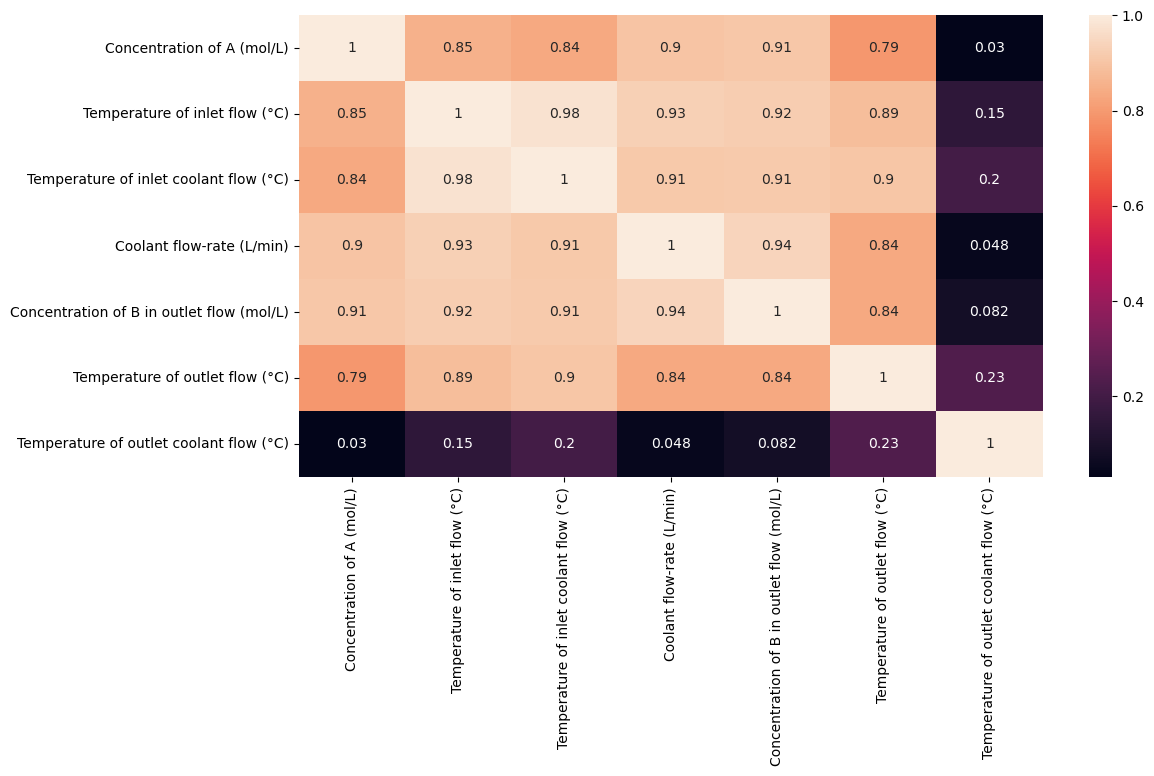

In [266]:
plt.figure(figsize=(12,6))
sns.heatmap(normal.corr(),annot = True)

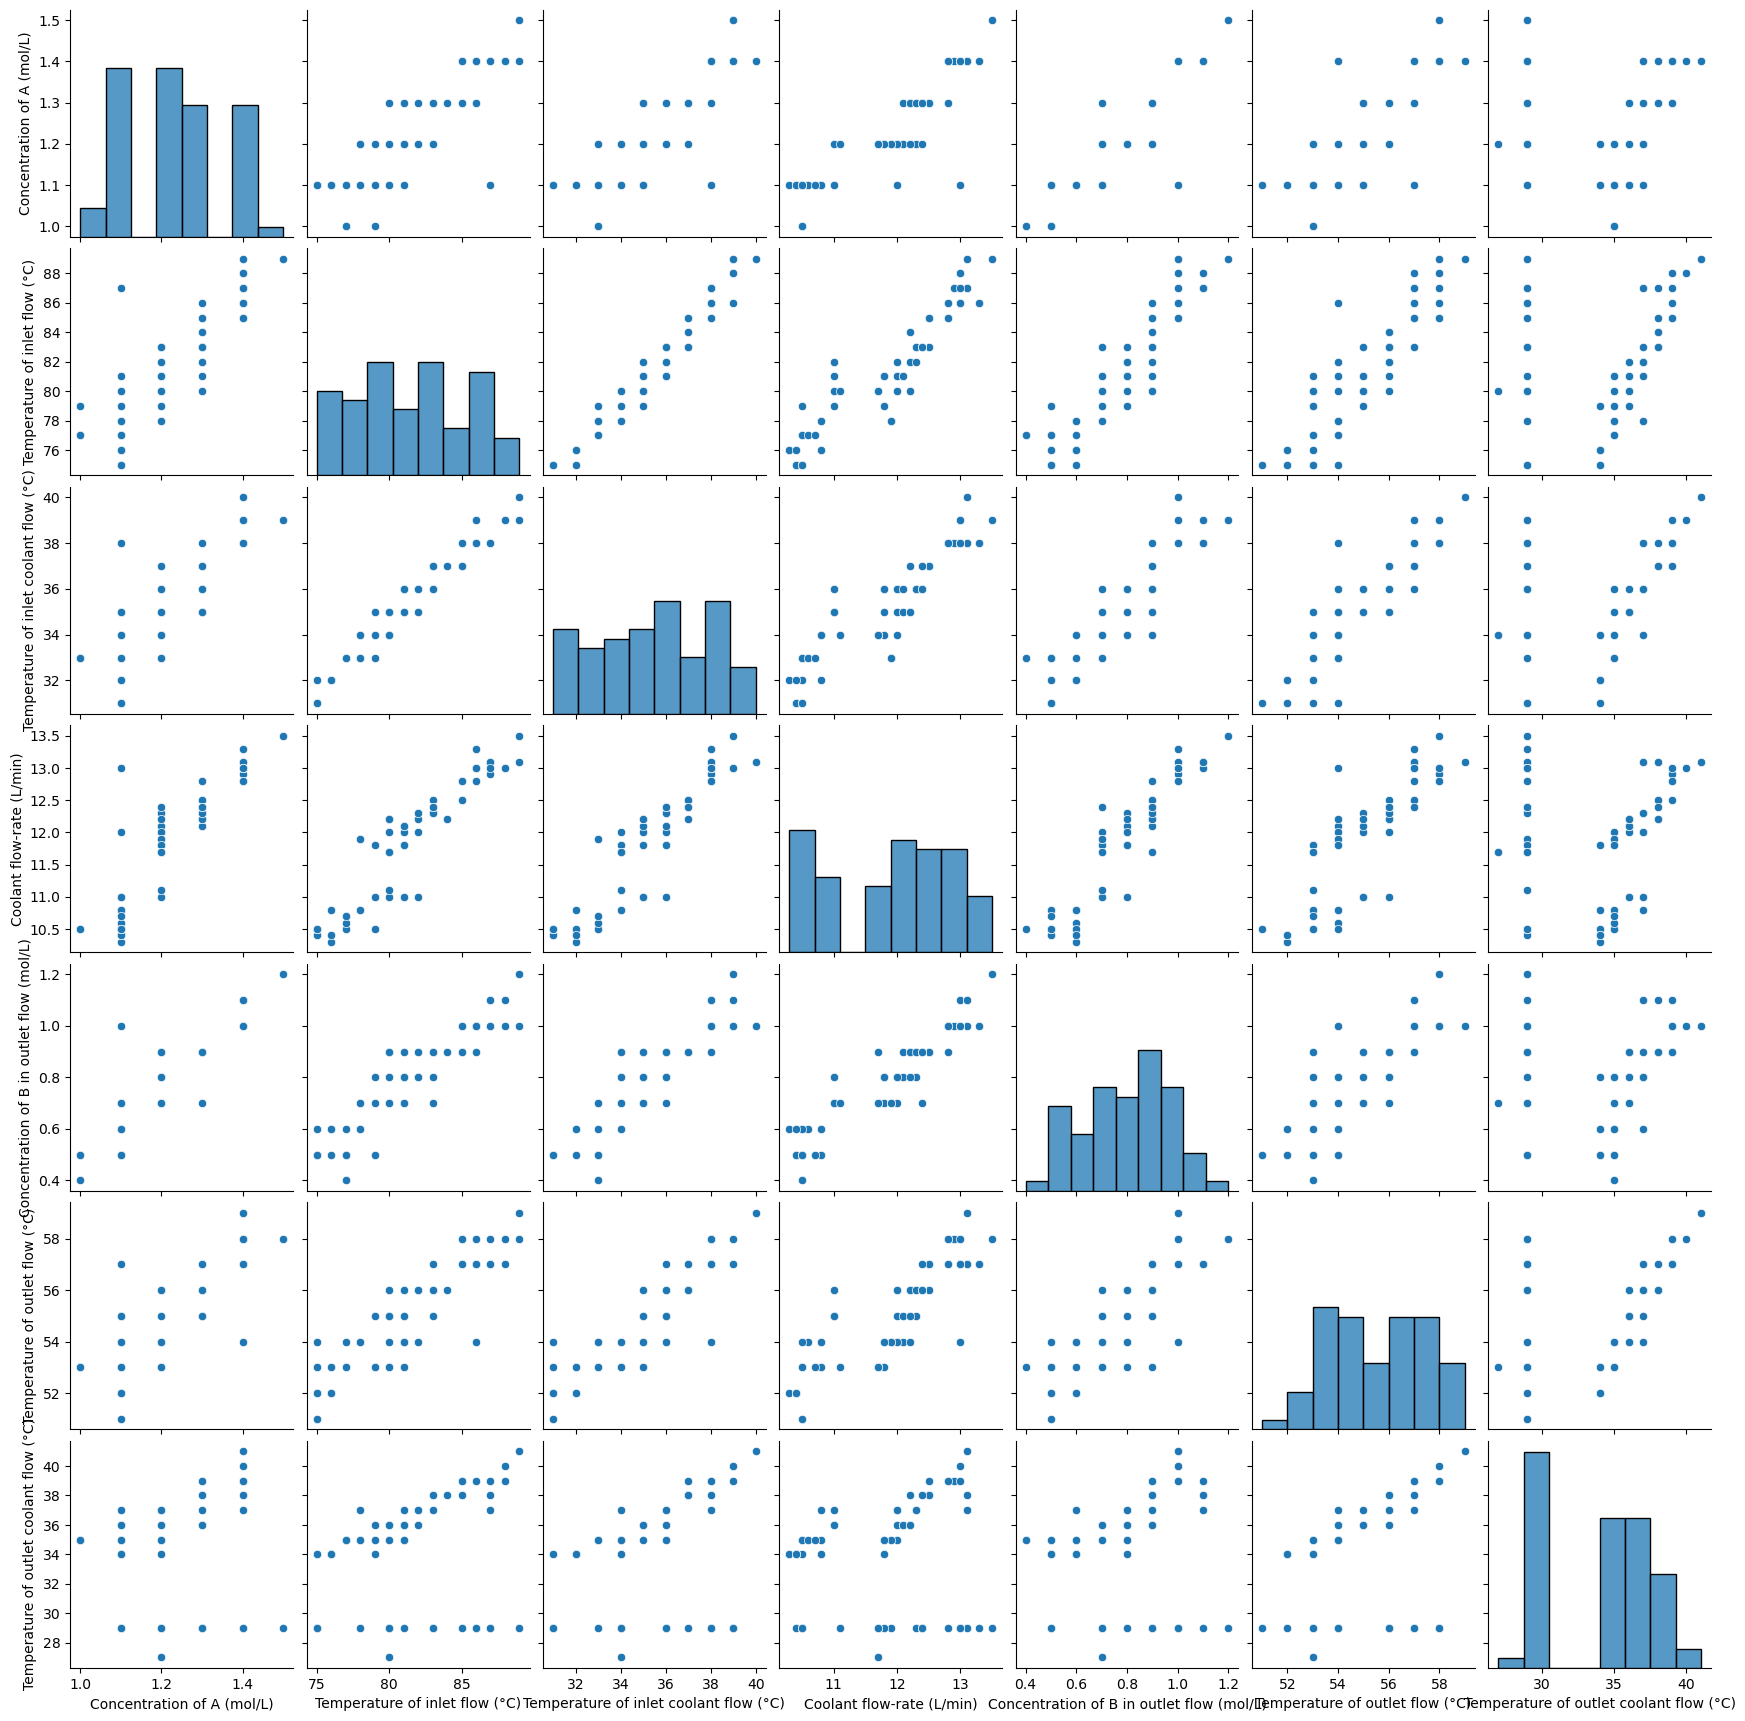

In [267]:
sns.pairplot(normal)

<AxesSubplot:>

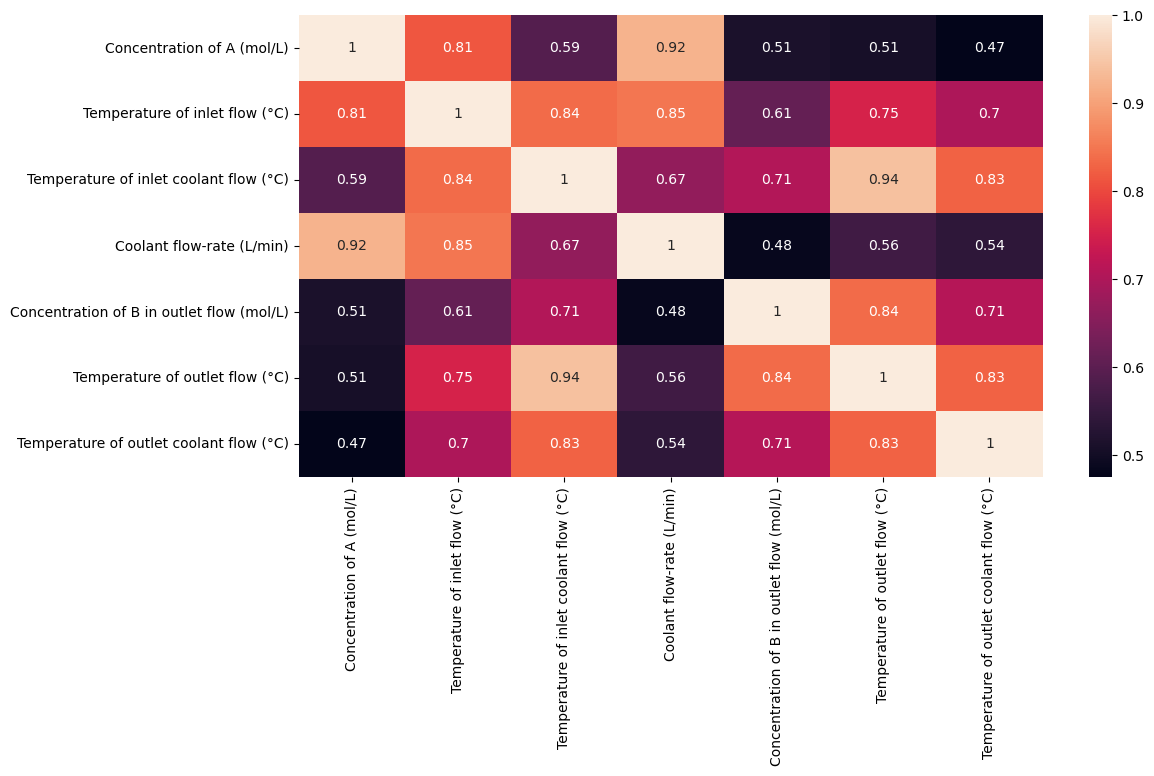

In [268]:
plt.figure(figsize=(12,6))
sns.heatmap(fault_A.corr(),annot = True)

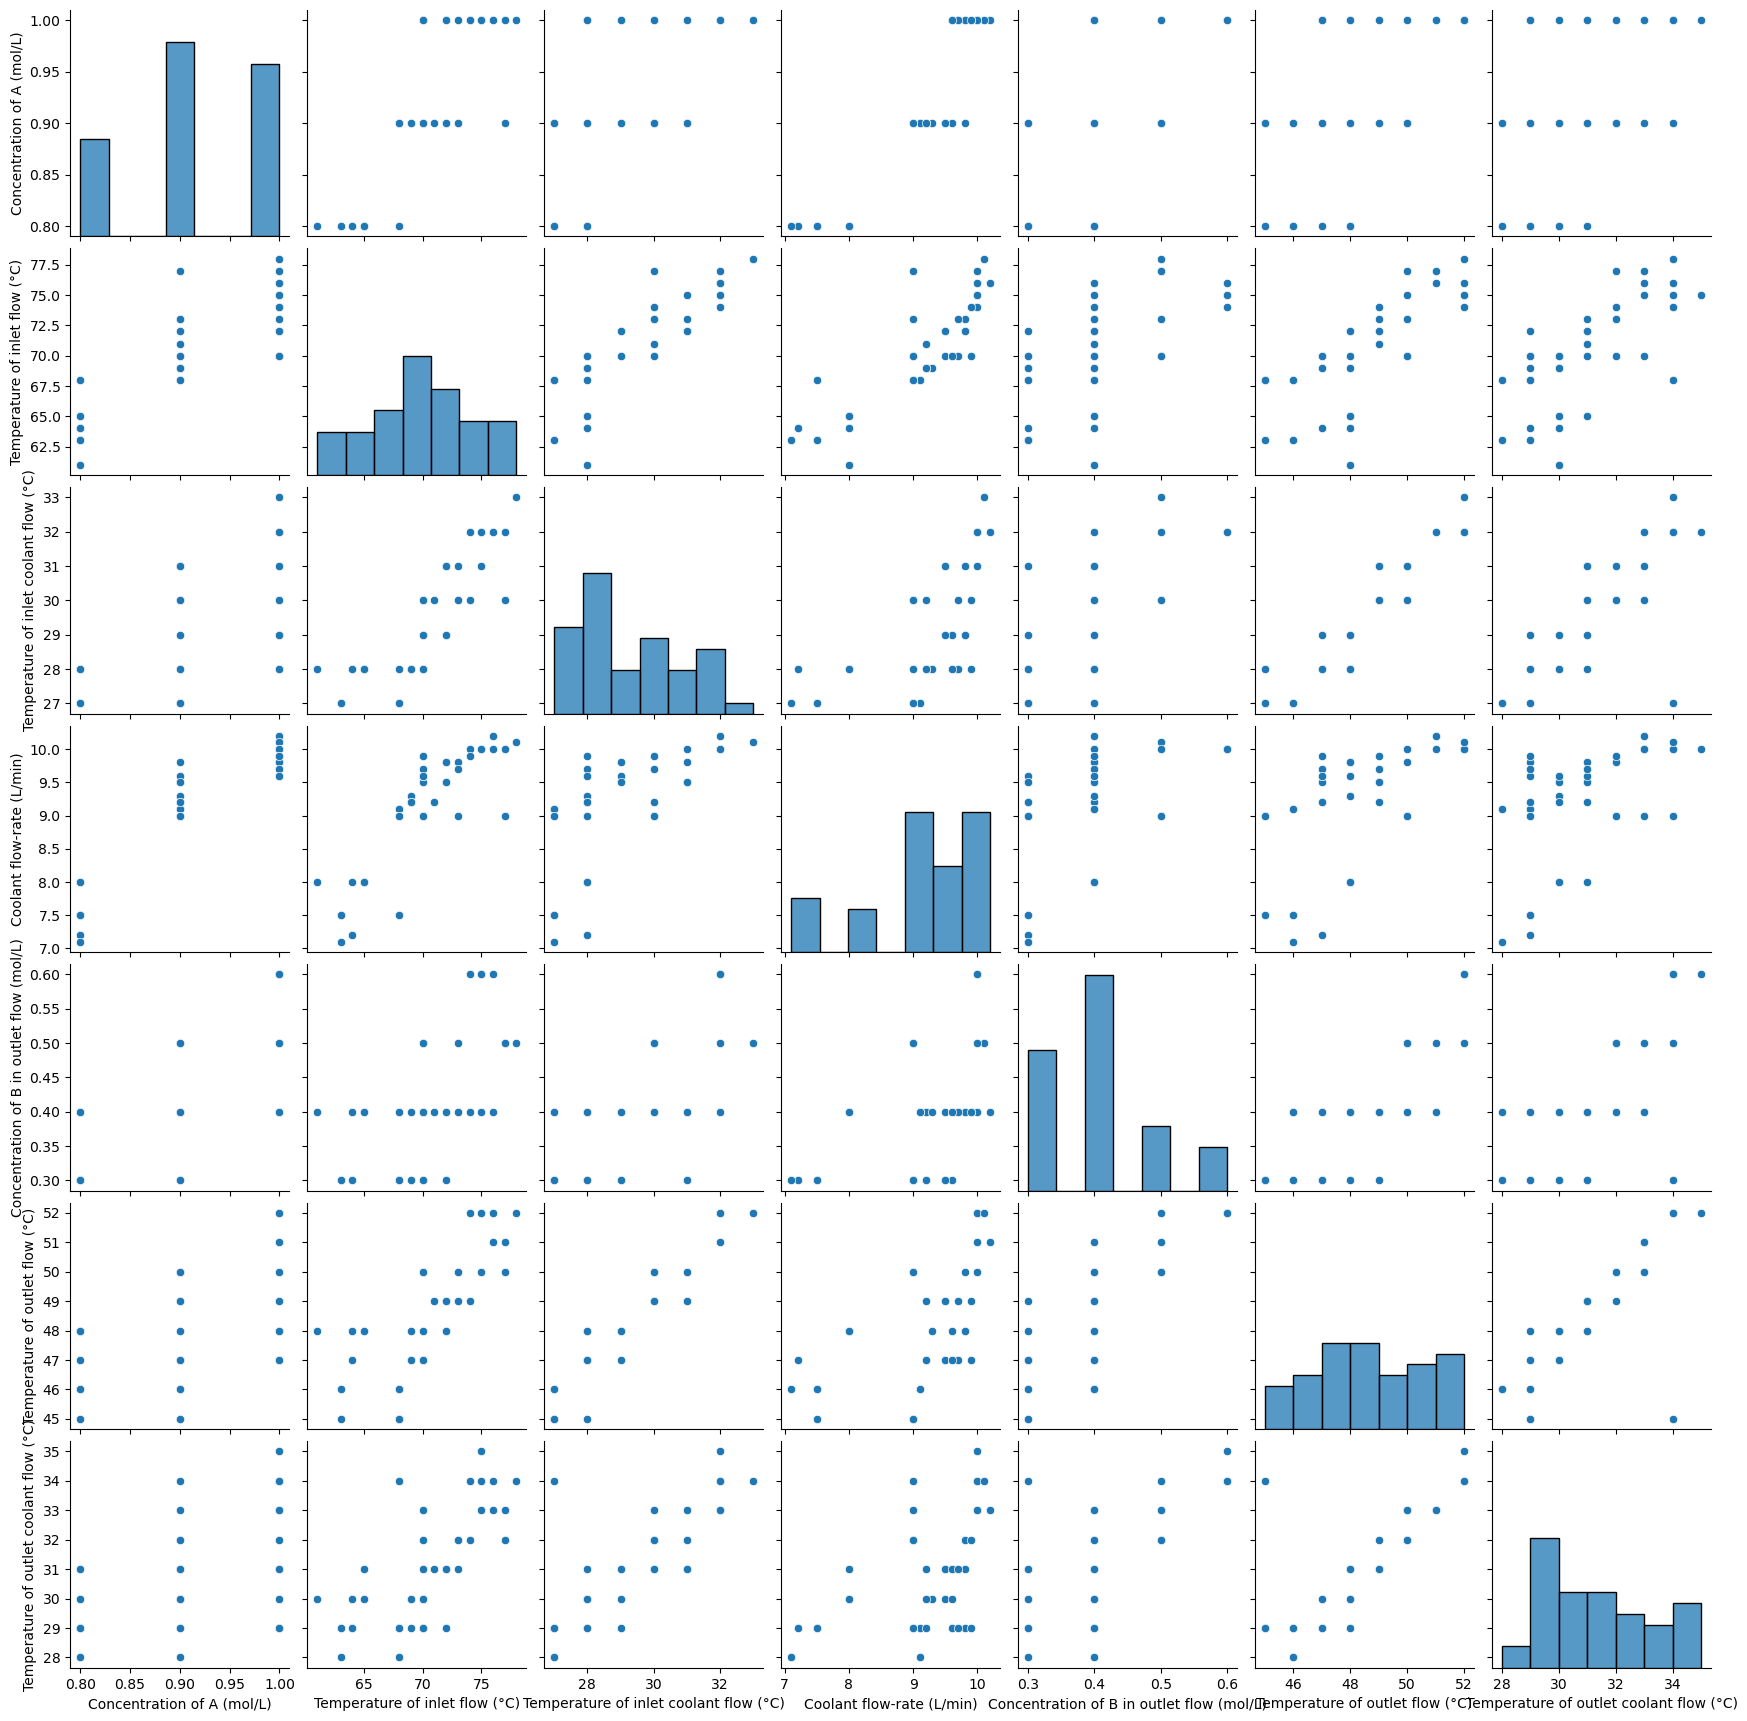

In [269]:
sns.pairplot(fault_A)

<AxesSubplot:>

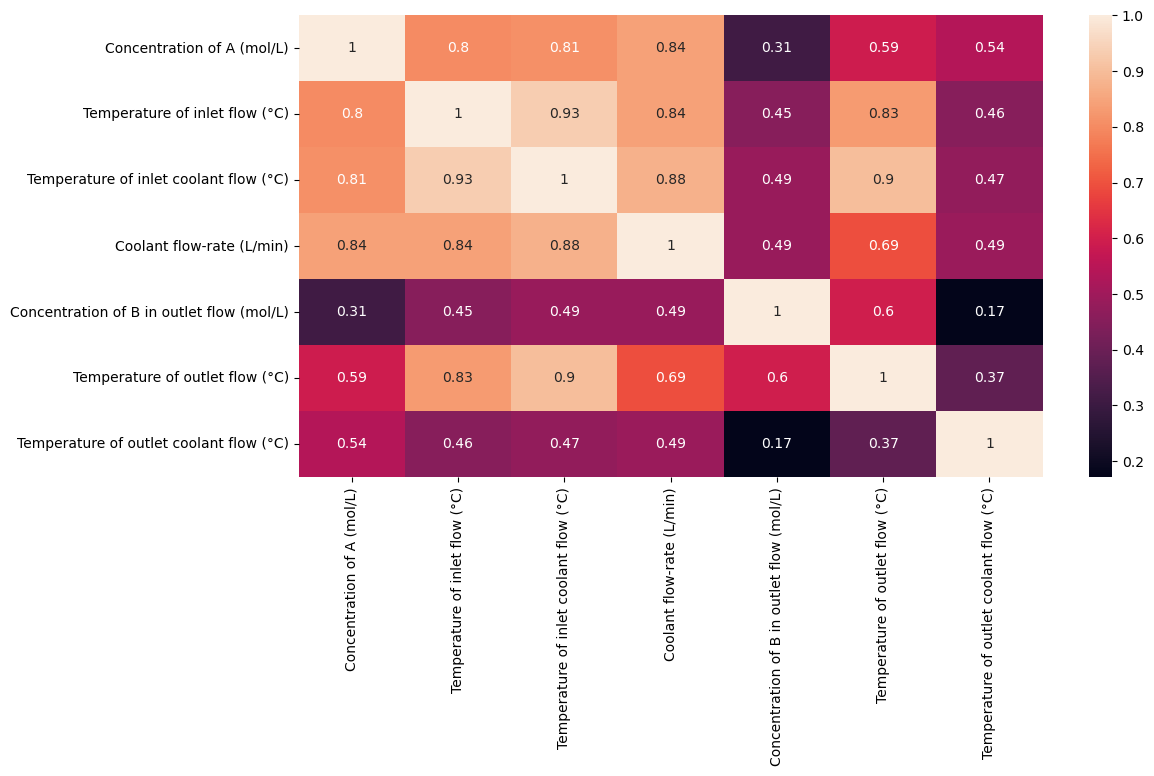

In [270]:
plt.figure(figsize=(12,6))
sns.heatmap(fault_B.corr(),annot = True)

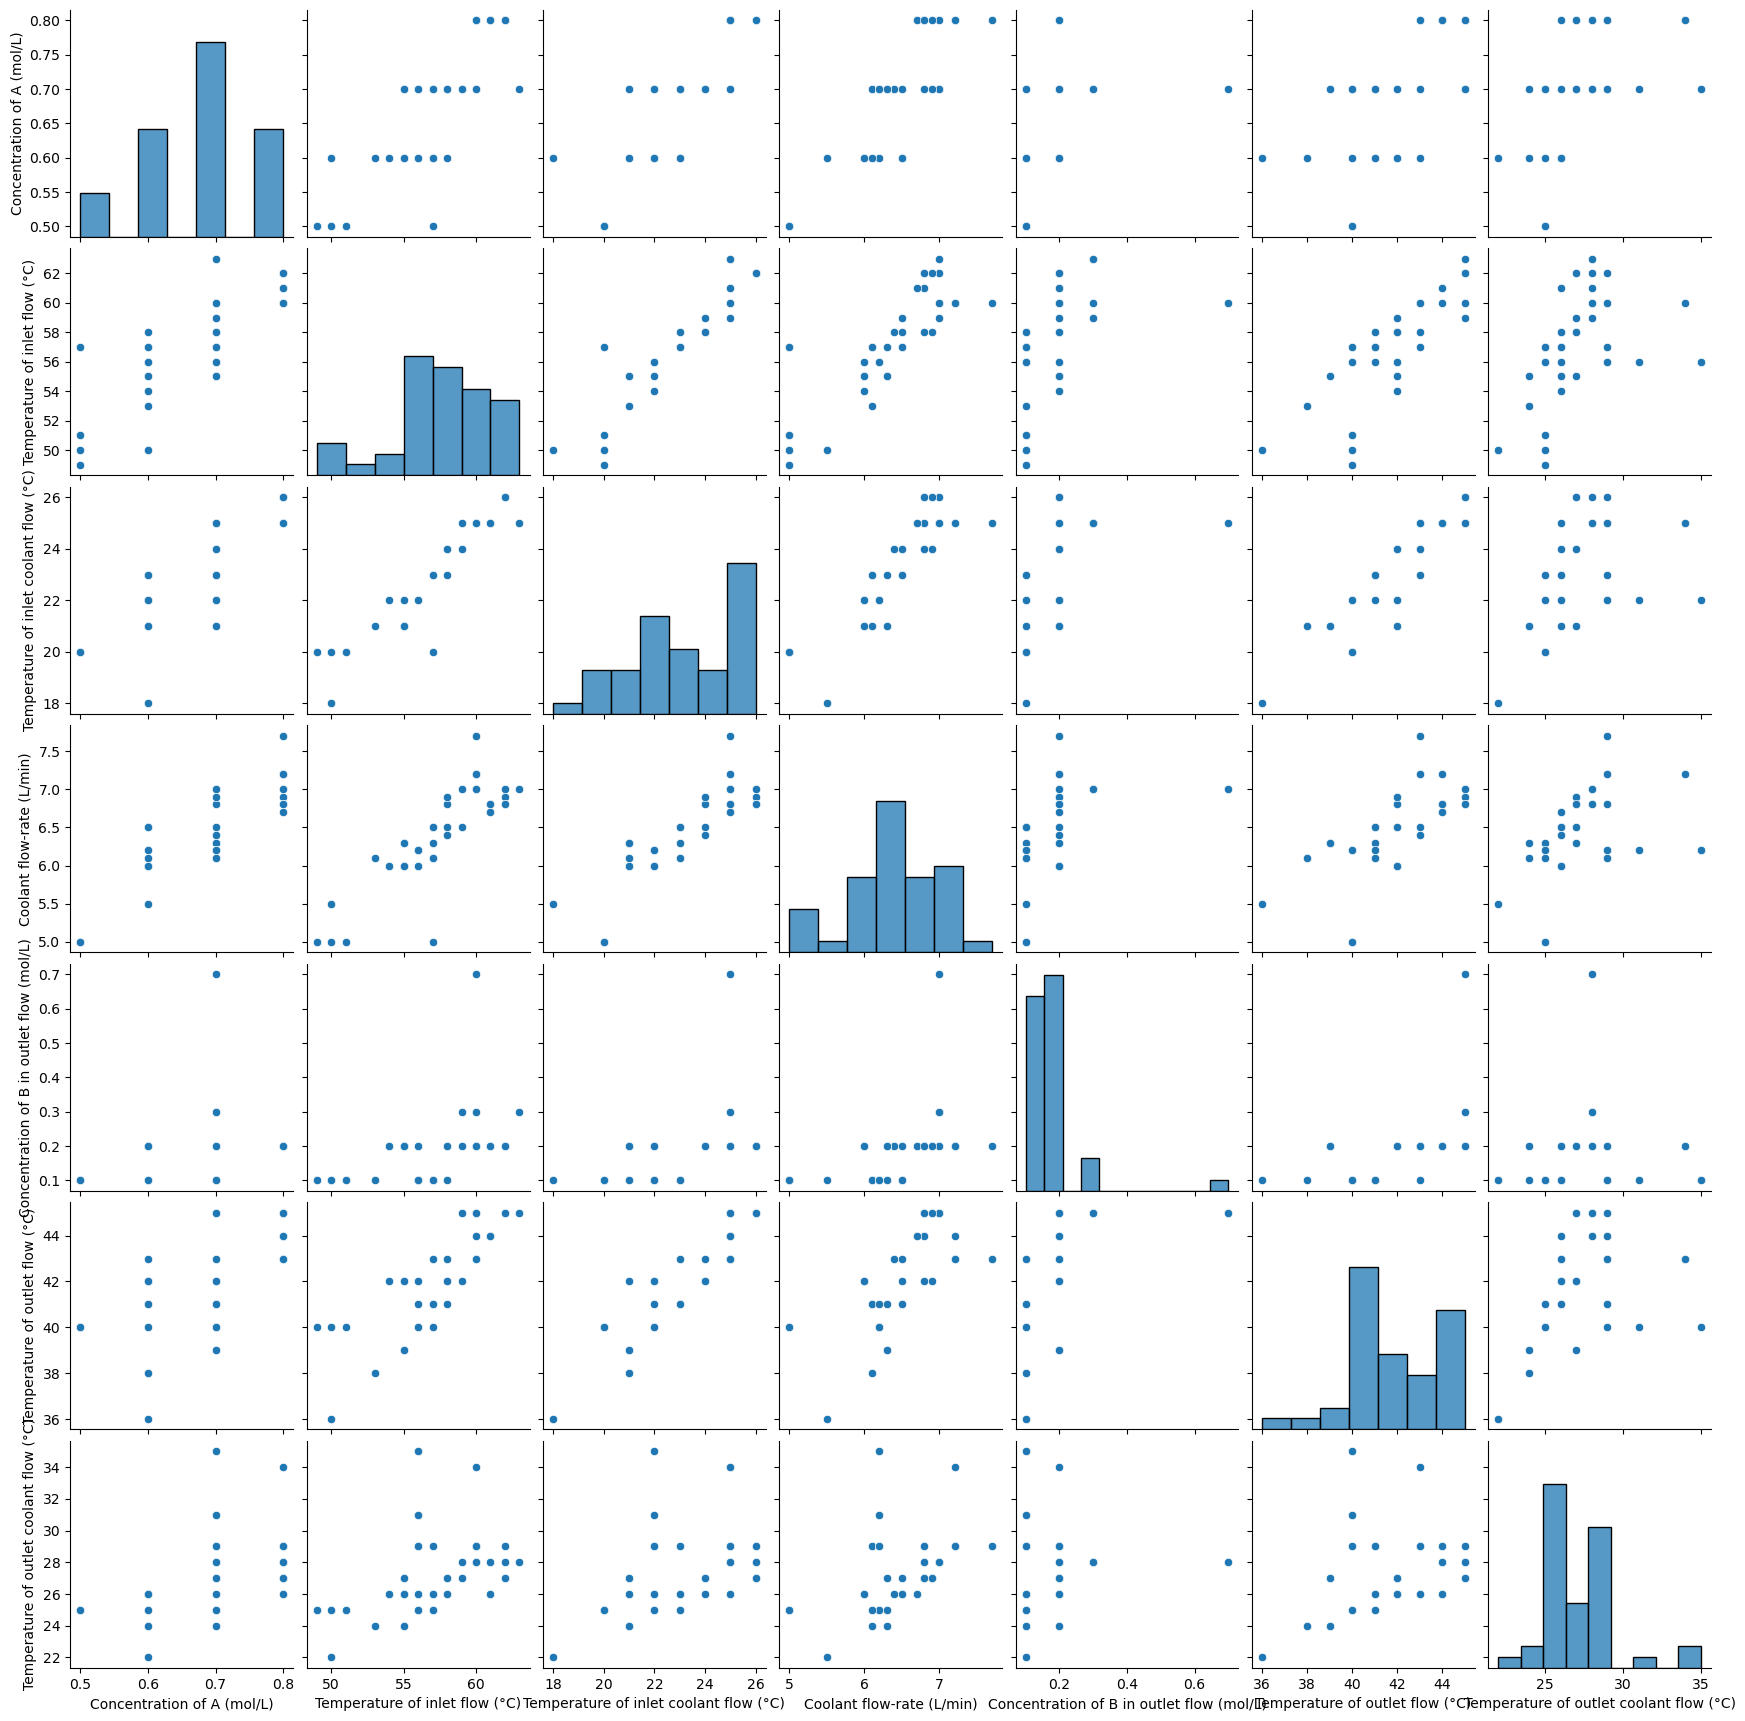

In [271]:
sns.pairplot(fault_B)

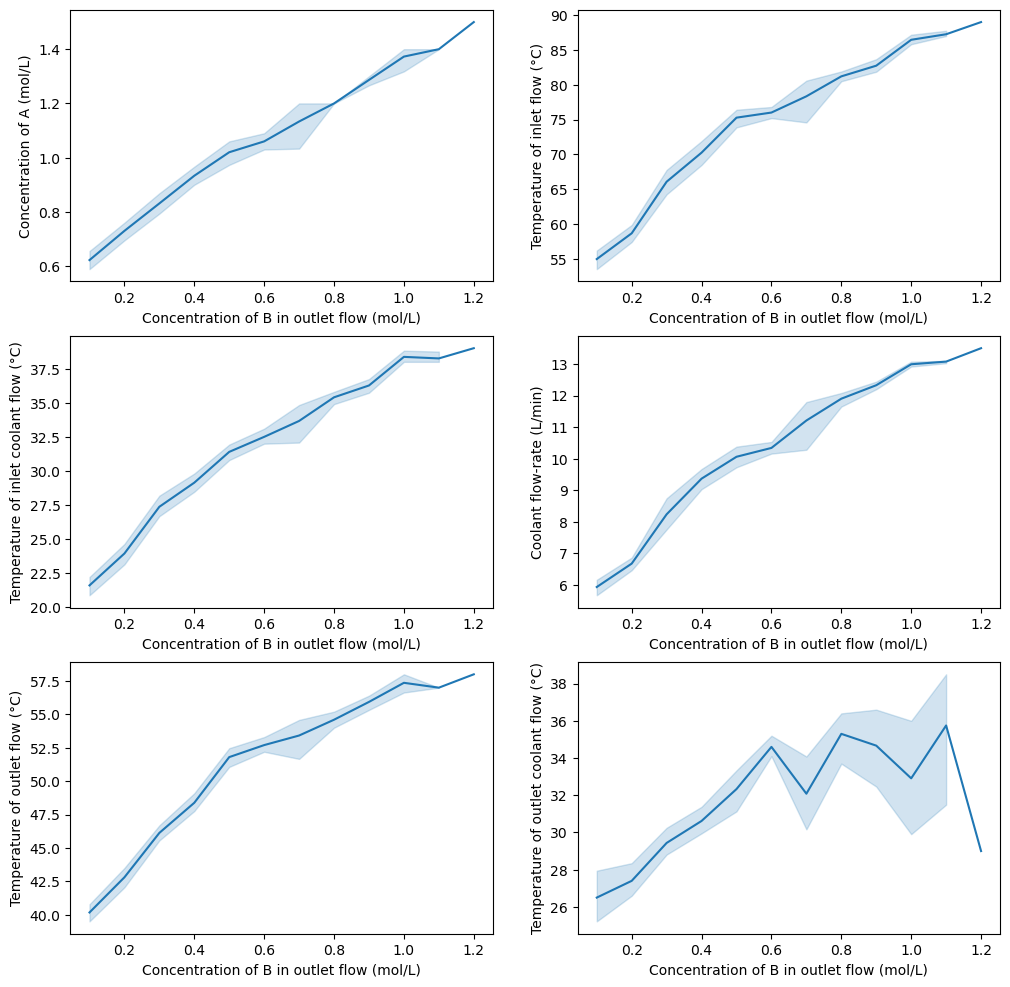

In [272]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Concentration of A (mol/L)', data=df, ax=axes[0,0])
axes[0, 0].set_ylabel('Concentration of A (mol/L)')
axes[0, 0].set_xlabel('Concentration of B in outlet flow (mol/L)')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Temperature of inlet flow (°C)', data=df, ax=axes[0,1])
axes[0, 1].set_ylabel('Temperature of inlet flow (°C)')
axes[0, 1].set_xlabel('Concentration of B in outlet flow (mol/L)')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Temperature of inlet coolant flow (°C)', data=df, ax=axes[1,0])
axes[1, 0].set_ylabel('Temperature of inlet coolant flow (°C)')
axes[1, 0].set_xlabel('Concentration of B in outlet flow (mol/L)')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Coolant flow-rate (L/min)', data=df, ax=axes[1,1])
axes[1, 1].set_ylabel('Coolant flow-rate (L/min)')
axes[1, 1].set_xlabel('Concentration of B in outlet flow (mol/L)')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Temperature of outlet flow (°C)', data=df, ax=axes[2,0])
axes[2, 0].set_ylabel('Temperature of outlet flow (°C)')
axes[2, 0].set_xlabel('Concentration of B in outlet flow (mol/L)')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Temperature of outlet coolant flow (°C)', data=df, ax=axes[2,1])
axes[2, 1].set_ylabel('Temperature of outlet coolant flow (°C)')
axes[2, 1].set_xlabel('Concentration of B in outlet flow (mol/L)')

plt.show()


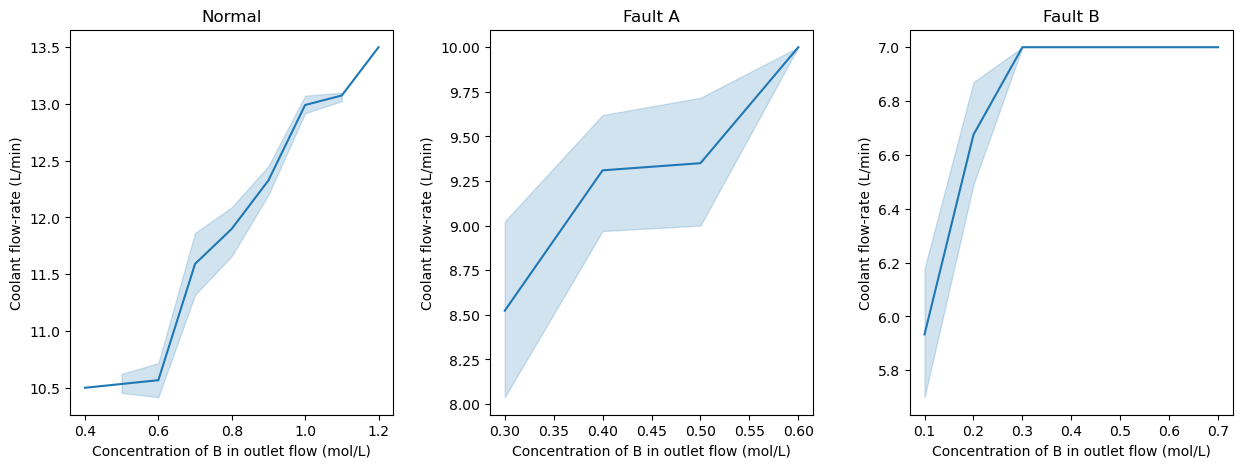

In [273]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Coolant flow-rate (L/min)', data=normal, ax=axs[0])
axs[0].set_title('Normal')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Coolant flow-rate (L/min)', data=fault_A, ax=axs[1])
axs[1].set_title('Fault A')

sns.lineplot(x='Concentration of B in outlet flow (mol/L)', y='Coolant flow-rate (L/min)', data=fault_B, ax=axs[2])
axs[2].set_title('Fault B')

plt.subplots_adjust(wspace=0.3)

plt.show()


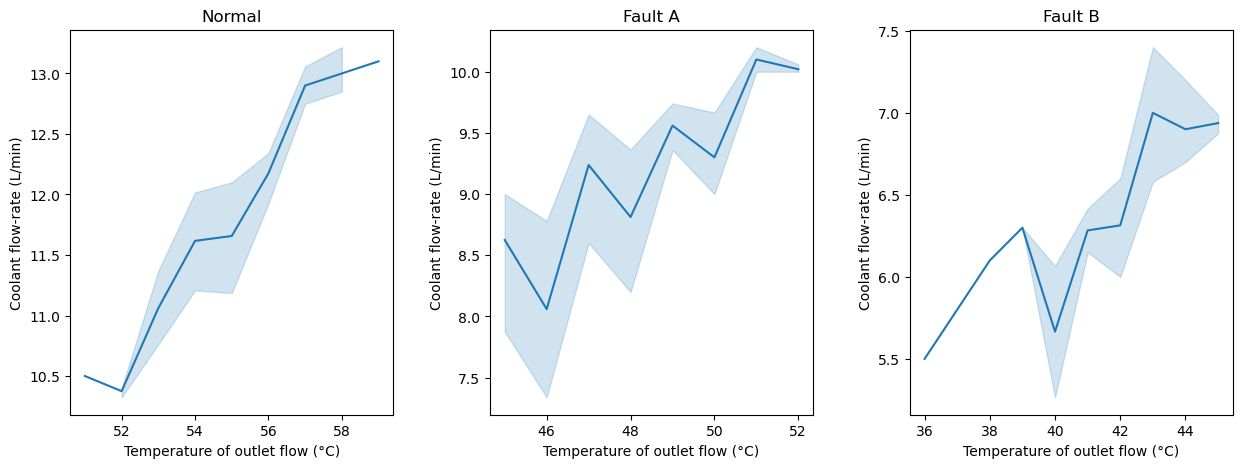

In [274]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(x='Temperature of outlet flow (°C)', y='Coolant flow-rate (L/min)', data=normal, ax=axs[0])
axs[0].set_title('Normal')

sns.lineplot(x='Temperature of outlet flow (°C)', y='Coolant flow-rate (L/min)', data=fault_A, ax=axs[1])
axs[1].set_title('Fault A')

sns.lineplot(x='Temperature of outlet flow (°C)', y='Coolant flow-rate (L/min)', data=fault_B, ax=axs[2])
axs[2].set_title('Fault B')

plt.subplots_adjust(wspace=0.3)

plt.show()

<AxesSubplot:xlabel='Concentration of B in outlet flow (mol/L)', ylabel='Density'>

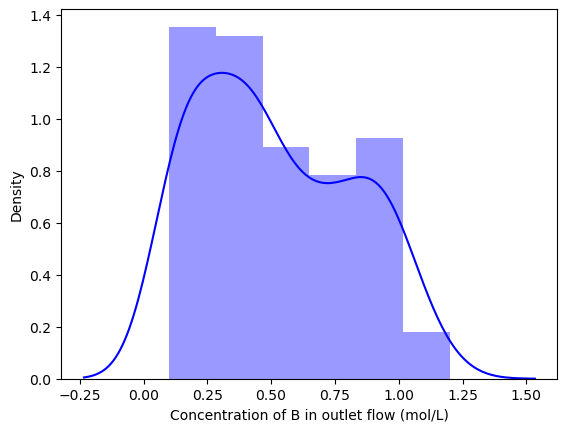

In [275]:
sns.distplot(df['Concentration of B in outlet flow (mol/L)'],kde = True,color = 'blue')

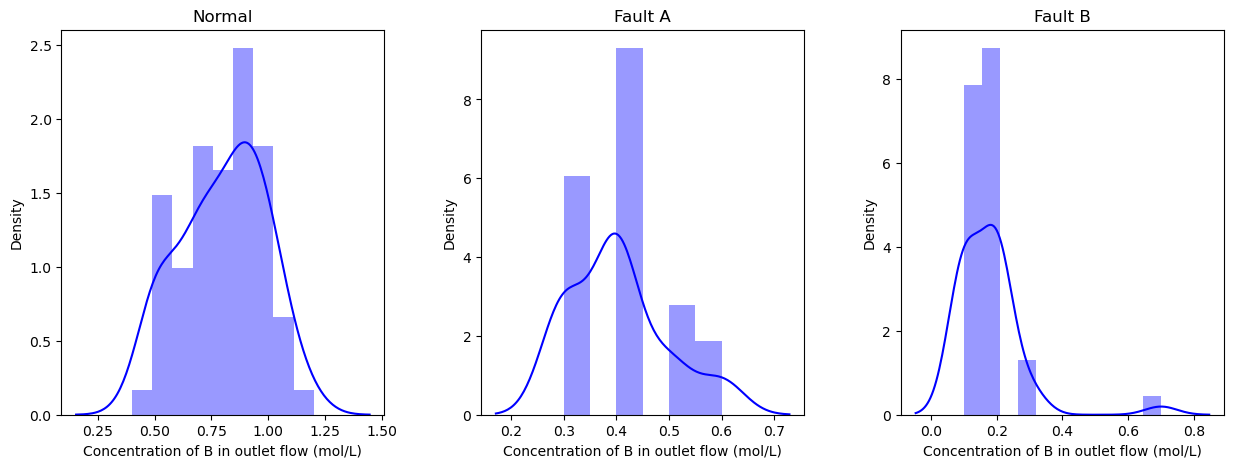

In [276]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.distplot(normal['Concentration of B in outlet flow (mol/L)'],kde = True,color = 'blue', ax=axs[0])
axs[0].set_title('Normal')

sns.distplot(fault_A['Concentration of B in outlet flow (mol/L)'],kde = True,color = 'blue',ax=axs[1])
axs[1].set_title('Fault A')

sns.distplot(fault_B['Concentration of B in outlet flow (mol/L)'],kde = True,color = 'blue',ax=axs[2])
axs[2].set_title('Fault B')

plt.subplots_adjust(wspace=0.3)

plt.show()

<AxesSubplot:xlabel='Coolant flow-rate (L/min)', ylabel='Density'>

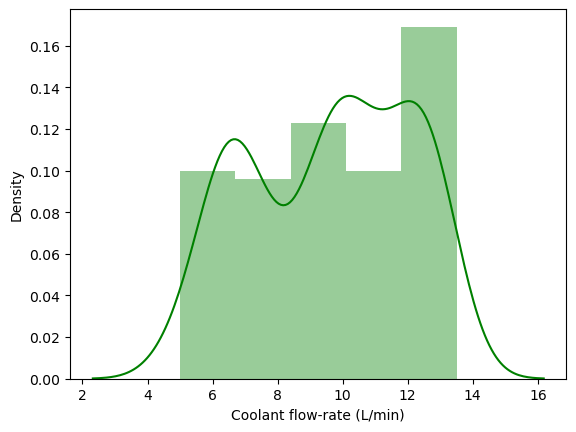

In [277]:
sns.distplot(df['Coolant flow-rate (L/min)'],kde = True,color = 'green')

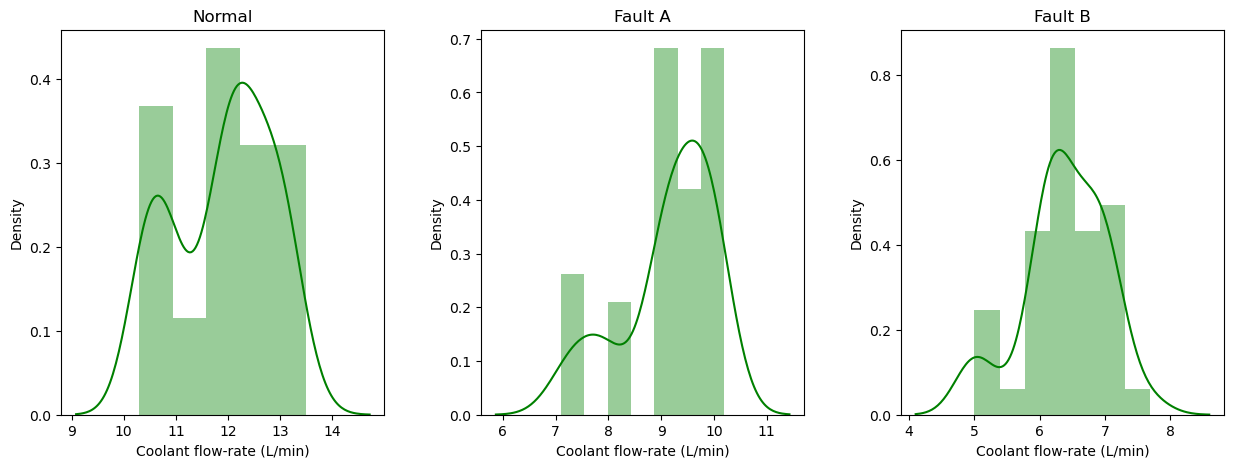

In [278]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.distplot(normal['Coolant flow-rate (L/min)'],kde = True,color = 'green', ax=axs[0])
axs[0].set_title('Normal')

sns.distplot(fault_A['Coolant flow-rate (L/min)'],kde = True,color = 'green',ax=axs[1])
axs[1].set_title('Fault A')

sns.distplot(fault_B['Coolant flow-rate (L/min)'],kde = True,color = 'green',ax=axs[2])
axs[2].set_title('Fault B')

plt.subplots_adjust(wspace=0.3)

plt.show()

## <font color = 'green'> Feature Engineering </font>

In [279]:
fault_type = {'Normal':0,'Fault Type A':1,'Fault Type B':2}
df['Fault Type'] = df['Fault Type'].map(fault_type)

In [280]:
df['Fault Type'].unique()

array([2, 1, 0], dtype=int64)

In [281]:
df.head()

,Concentration of A (mol/L),Temperature of inlet flow (°C),Temperature of inlet coolant flow (°C),Coolant flow-rate (L/min),Concentration of B in outlet flow (mol/L),Temperature of outlet flow (°C),Temperature of outlet coolant flow (°C),Fault Type
0,0.5,50,20,5.0,0.1,40,25,2
1,0.6,55,22,6.0,0.2,42,26,2
2,0.7,60,25,7.0,0.3,45,28,2
3,0.8,65,28,8.0,0.4,48,30,1
4,0.9,70,30,9.0,0.5,50,32,1


## Splitting the Data

In [282]:
x = df.drop(df.columns[[-1]],axis = 1)
y = df['Fault Type']

In [283]:
x.shape,y.shape

((153, 7), (153,))

In [284]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [285]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((122, 7), (31, 7), (122,), (31,))

## Scaling

In [286]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

# Classification

In [287]:
log_reg = LogisticRegression()
svc_classifier = SVC(probability=True)
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(500)

# Training

In [288]:
log_reg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=500)

# Predicting

In [289]:
logreg_ypred = log_reg.predict(xtest)
svcclassifier_ypred = svc_classifier.predict(xtest)
dtclassifier_ypred = dt_classifier.predict(xtest)
knnclassifier_ypred = knn_classifier.predict(xtest)
rfclassifier_ypred = rf_classifier.predict(xtest)

# Testing

In [290]:
from sklearn.metrics import accuracy_score

log_reg_accur = accuracy_score(ytest,logreg_ypred)
svc_classifier_accur = accuracy_score(ytest,logreg_ypred)
dt_classifier_accur = accuracy_score(ytest,logreg_ypred)
knn_classifier_accur = accuracy_score(ytest,logreg_ypred)
rf_classifier_accur = accuracy_score(ytest,logreg_ypred)

In [291]:
print("Logistic Regression :",round(log_reg_accur*100,2))
print("Svc Classifier :",round(svc_classifier_accur*100,2))
print("DecsionTree Classifier :",round(dt_classifier_accur*100,2))
print("knn Classifier :",round(knn_classifier_accur*100,2))
print("RandomForestClassifier :",round(rf_classifier_accur*100,2))

Logistic Regression : 93.55
Svc Classifier : 93.55
DecsionTree Classifier : 93.55
knn Classifier : 93.55
RandomForestClassifier : 93.55


# Evaluation
# SVM

In [292]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot:>

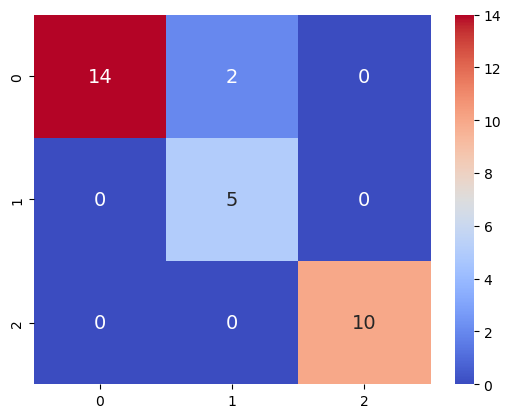

In [293]:
cm = confusion_matrix(ytest,svcclassifier_ypred)
sns.heatmap(cm,annot=True,cmap = 'coolwarm',annot_kws={"fontsize":14},fmt='g')

In [294]:
print(classification_report(ytest,svcclassifier_ypred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10

    accuracy                           0.94        31
   macro avg       0.90      0.96      0.92        31
weighted avg       0.95      0.94      0.94        31



# HyperParameters
# Grid Search

In [310]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
grid = GridSearchCV(SVC(probability=True),param_grid,cv=5,refit=True,verbose=3)

In [313]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.400 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [314]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [315]:
grid.best_estimator_

SVC(C=10, gamma=1, probability=True)

In [316]:
y_grid_predict = grid.predict(xtest)

<AxesSubplot:>

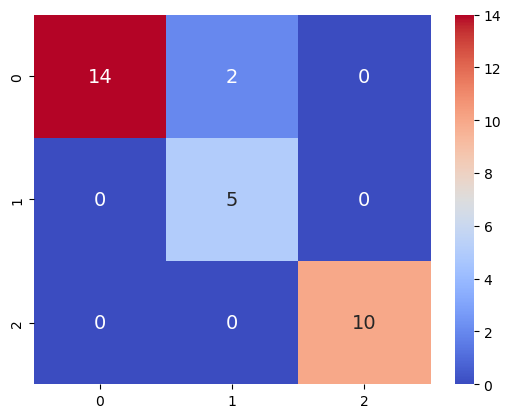

In [317]:
cm = confusion_matrix(ytest,y_grid_predict)
sns.heatmap(cm,annot = True,cmap = 'coolwarm',annot_kws={'fontsize':14},fmt= 'g')

In [303]:
print(classification_report(ytest,y_grid_predict))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00        10

    accuracy                           0.94        31
   macro avg       0.90      0.96      0.92        31
weighted avg       0.95      0.94      0.94        31



# ROC Curve

In [304]:
from sklearn.metrics import roc_auc_score

In [305]:
y_predict_proba = svc_classifier.predict_proba(xtest)

In [306]:
y_predict_proba

array([[0.0154622 , 0.8088947 , 0.17564309],
       [0.00932582, 0.0115046 , 0.97916958],
       [0.97647853, 0.00824491, 0.01527656],
       [0.98564734, 0.00557456, 0.0087781 ],
       [0.93529858, 0.05432732, 0.0103741 ],
       [0.01597899, 0.00744613, 0.97657487],
       [0.01203272, 0.02915108, 0.9588162 ],
       [0.95336138, 0.03813618, 0.00850245],
       [0.01954185, 0.29922603, 0.68123212],
       [0.21909902, 0.77215282, 0.00874816],
       [0.9756408 , 0.00940056, 0.01495864],
       [0.97976708, 0.00675815, 0.01347478],
       [0.64146106, 0.34674967, 0.01178927],
       [0.97713201, 0.00888381, 0.01398417],
       [0.45533639, 0.53383273, 0.01083088],
       [0.01294274, 0.01466758, 0.97238968],
       [0.01680389, 0.00770134, 0.97549477],
       [0.97900408, 0.00771852, 0.0132774 ],
       [0.02108932, 0.56570419, 0.41320649],
       [0.96134417, 0.01628484, 0.02237099],
       [0.01157591, 0.02618059, 0.9622435 ],
       [0.0099941 , 0.00895581, 0.98105009],
       [0.

In [307]:
roc_auc_score(ytest,y_predict_proba,multi_class='ovr')

0.9974358974358974

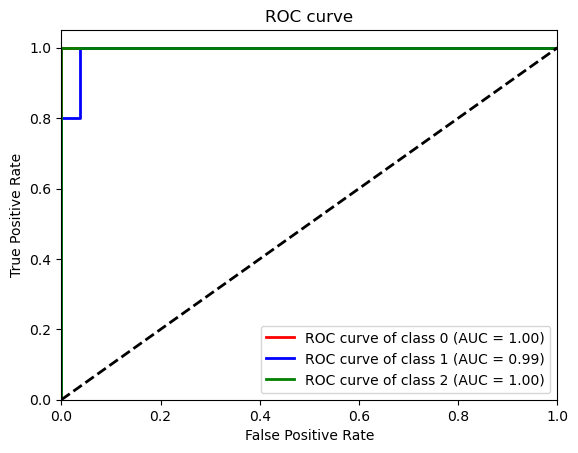

In [308]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Train a logistic regression classifier
clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(xtrain,ytrain)

# Compute the predicted probabilities for the test set
y_score = clf.predict_proba(xtest)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(ytest == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure()
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


## Precision Curve

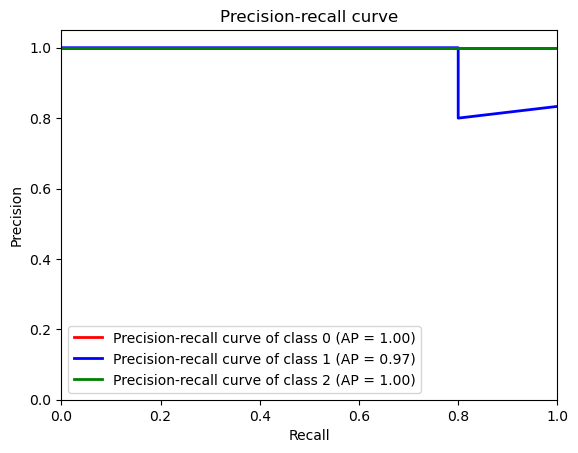

In [309]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute the precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(ytest == i, y_score[:, i])
    average_precision[i] = average_precision_score(ytest == i, y_score[:, i])

# Plot the precision-recall curves
plt.figure()
colors = ['red', 'blue', 'green']
for i, color in zip(range(3), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()
